# Boston Ev Fiyatları Tahmini
------------
# Boston Housing Dataset

# Dataset'in İndirilmesi, İncelenmesi ve Normalizasyonu

In [ ]:
# boston_housing dataset'in çekilmesi ve gerekli olan kütüphanenin import edilmesi
from keras.datasets import boston_housing

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
# shape'lerinin gösterimi ve incelenmesi
len(train_data)

404

In [ ]:
len(train_data[0])

13

In [ ]:
len(test_data)

102

In [ ]:
len(test_data[0])

13

In [ ]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
# Train ve test verilerine normalizasyon işlemi uygulanması
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [ ]:
test_data -= mean
test_data /= std

# Model'in Kurulması

In [ ]:
# Model için gerekli kütüphanelerin import edilmesi
from keras import models
from keras import layers

In [ ]:
# Oluşturulan modelin fonksiyonu
# (metrics -> mean_absolute_error)
def myModel():
    model = models.Sequential()

    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    
    return model

In [ ]:
myModel().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# Modelin Eğitilmesi

In [ ]:
# Numpy array'larla işlem yapabilmek için gerekli kütüphanenin import edilmesi
import numpy as np

In [ ]:
# K-flod Çapraz Doğrulamada kullanılacak parametrelerin ayarlanması
# (Çok az train verisi olduğundan dolayı validation için uygun bir yöntem.)
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
# K-flod kullanarak modelin eğitilmesi
# 
# (train belirlenen k parametresi kadar parçalanır ve sırasıyla her parçayla validation yapılır.)
# (Her seferinde yeni bir modelle baştan eğitilir ve daha sonra kayıpların ortalaması alınır.)
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = myModel()

    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
# Validation sonuçları
all_scores

[2.598421335220337, 2.531395435333252, 2.4560699462890625, 2.744492530822754]

In [ ]:
# # Ortalama validation sonucu
np.mean(all_scores)

2.5825948119163513

In [ ]:
from keras import backend as K

In [ ]:
K.clear_session()

In [ ]:
# (Daha uzun eğitilerek epoch 500 yapıldı)
# (Modelin eğitim süreceini inceleyebilmek için history'ler kaydediliyor.)
num_epochs = 500
all_mae_histories = []

In [ ]:
for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = myModel()

    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
# Her history'nin uzunluğu kadar dönerek kaypların ortalamalarını hesaplar.
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Model Kaybının İncelenmesi

In [ ]:
# Grafik çizdirmek için gerekli olan kütüphanenin import edilmesi
import matplotlib.pyplot as plt

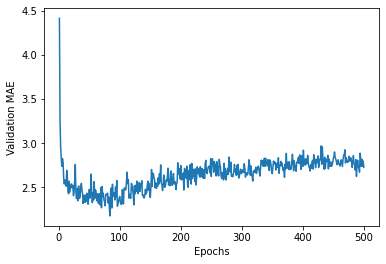

In [ ]:
# Modelin kayıp grafiğinin gösterimi
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Grafiğin geçişlerini yumuşatmak için kullanılacak fonksiyon
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [ ]:
# (İlk 10 adımın değeri genel grafikle çok farkı diye çıkarılıyor.)
smooth_mae_history = smooth_curve(average_mae_history[10:])

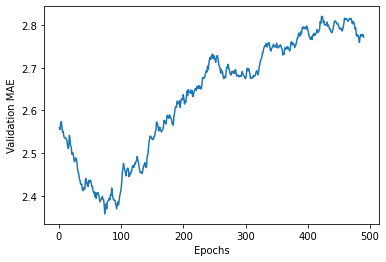

In [ ]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Model'in optimum değer gösterdiği epoch'ta tekrar eğitilmesi
model = myModel()

In [ ]:
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

In [ ]:
# Model'in test verisi ile değerlendirilmesi
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.4089 - mean_absolute_error: 2.6049


In [ ]:
test_mae_score

2.604898691177368